## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

import pathlib
import random
import matplotlib as plt
import matplotlib.pyplot
import matplotlib.image

from tqdm import tqdm

import os

## Download Dataset

In [1]:
!pip install gdown

file_id = "16QB4hWxPaV-BL1mSnKoTVv0U63W-wzwa"
output_file = "garbageClassification.zip"

!gdown --id $file_id -O $output_file

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16QB4hWxPaV-BL1mSnKoTVv0U63W-wzwa
To: /content/garbageClassification.zip
100% 386M/386M [00:04<00:00, 86.9MB/s]


In [2]:
import zipfile

# Extract the archive
local_zip = './garbageClassification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/garbageClassification')
zip_ref.close()

In [3]:
import os

base_dir = 'tmp/garbageClassification'

# kaleng, kertas, kardus, botol_plastik
kaleng_dir = os.path.join(base_dir, 'kaleng')
kertas_dir = os.path.join(base_dir, 'kertas')
kardus_dir = os.path.join(base_dir, 'kardus')
botol_plastik_dir = os.path.join(base_dir, 'botol_plastik')

print('total training cans images:', len(os.listdir(kaleng_dir)))
print('total training cardboard images:', len(os.listdir(kardus_dir)))
print('total training paper images:', len(os.listdir(kertas_dir)))
print('total training plastic_bottles images:', len(os.listdir(botol_plastik_dir)))

cans_files = os.listdir(kaleng_dir)
print(cans_files[:10])

paper_files = os.listdir(kertas_dir)
print(paper_files[:10])

cardboard_files = os.listdir(kardus_dir)
print(cardboard_files[:10])

plastic_bottles_files = os.listdir(botol_plastik_dir)
print(plastic_bottles_files[:10])

total training cans images: 1000
total training cardboard images: 1000
total training paper images: 1000
total training plastic_bottles images: 1000
['AluCan688.jpg', 'AluCan874.jpg', 'AluCan716.jpg', 'AluCan613.jpg', 'AluCan336.jpg', 'AluCan75.jpg', 'AluCan799.jpg', 'AluCan605.jpg', 'AluCan127.jpg', 'AluCan487.jpg']
['paper960.jpg', 'paper751.jpg', 'paper970.jpg', 'paper787.jpg', 'paper603.jpg', 'paper15.jpg', 'paper730.jpg', 'paper150.jpg', 'paper643.jpg', 'paper217.jpg']
['cardboard748.jpg', 'cardboard882.jpg', 'cardboard703.jpg', 'cardboard378.jpg', 'NBSJHODHTY2C.jpg', 'cardboard225.jpg', 'cardboard858.jpg', 'cardboard588.jpg', 'ZA88T69MF2SB.jpg', 'cardboard267.jpg']
['PET1,309.jpg', 'PET861.jpg', 'PET1,304.jpg', 'PET990.jpg', 'PET1,549.jpg', 'PET1,095.jpg', 'PET1,046.jpg', 'PET757.jpg', 'PET1,572.jpg', 'PET1,305.jpg']


## Split the Dataset

In [ ]:
import shutil

# Define root directory
root_dir = 'data/'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# create_train_val_dirs
def create_train_val_dirs(root_path):

  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kaleng'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kertas'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kardus'))
  os.makedirs(os.path.join(f'{root_path}/training', 'botol_plastik'))
  os.makedirs(os.path.join(root_path, 'validation'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kaleng'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kertas'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kardus'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'botol_plastik'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test create_train_val_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

data/validation
data/training
data/validation/botol_plastik
data/validation/kaleng
data/validation/kardus
data/validation/kertas
data/training/botol_plastik
data/training/kaleng
data/training/kardus
data/training/kertas


In [ ]:
from shutil import copyfile

# split_data
def split_data(source_dir, training_dir, validation_dir, split_size):

    # Shuffle list
  shuffled_source = random.sample(os.listdir(source_dir), len(os.listdir(source_dir)))

  # Find total number of files in training dir
  training_number = int(len(shuffled_source) * split_size)

  i = 0
  target = training_dir

  for item in shuffled_source:
    item_source = os.path.join(source_dir, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      copyfile(item_source, os.path.join(target, item))
    i += 1

    # Switch copy target to VALIDATION_DIR
    if i == training_number:
      target = validation_dir

In [ ]:
# Test your split_data function

# Define paths
kardus_source_dir = "tmp/garbageClassification/kardus"
botol_plastik_source_dir = "tmp/garbageClassification/botol_plastik"
kaleng_source_dir = "tmp/garbageClassification/kaleng"
kertas_source_dir = "tmp/garbageClassification/kertas"

training_dir = "data/training"
validation_dir = "data/validation"

training_kardus_dir = os.path.join(training_dir, "kardus/")
validation_kardus_dir = os.path.join(validation_dir, "kardus/")

training_botol_plastik_dir = os.path.join(training_dir, "botol_plastik/")
validation_botol_plastik_dir = os.path.join(validation_dir, "botol_plastik/")

training_kaleng_dir = os.path.join(training_dir, "kaleng/")
validation_kaleng_dir = os.path.join(validation_dir, "kaleng/")

training_kertas_dir = os.path.join(training_dir, "kertas/")
validation_kertas_dir = os.path.join(validation_dir, "kertas/")

In [ ]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(training_kardus_dir)) > 0:
  for file in os.scandir(training_kardus_dir):
    os.remove(file.path)
if len(os.listdir(training_botol_plastik_dir)) > 0:
  for file in os.scandir(training_botol_plastik_dir):
    os.remove(file.path)
if len(os.listdir(training_kaleng_dir)) > 0:
  for file in os.scandir(training_kaleng_dir):
    os.remove(file.path)
if len(os.listdir(training_kertas_dir)) > 0:
  for file in os.scandir(training_kertas_dir):
    os.remove(file.path)


if len(os.listdir(validation_kardus_dir)) > 0:
  for file in os.scandir(validation_kardus_dir):
    os.remove(file.path)
if len(os.listdir(validation_botol_plastik_dir)) > 0:
  for file in os.scandir(validation_botol_plastik_dir):
    os.remove(file.path)
if len(os.listdir(validation_kaleng_dir)) > 0:
  for file in os.scandir(validation_kaleng_dir):
    os.remove(file.path)
if len(os.listdir(validation_kertas_dir)) > 0:
  for file in os.scandir(validation_kertas_dir):
    os.remove(file.path)

In [ ]:
split_size = .8

In [ ]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(kardus_source_dir, training_kardus_dir, validation_kardus_dir, split_size)
split_data(botol_plastik_source_dir, training_botol_plastik_dir, validation_botol_plastik_dir, split_size)
split_data(kaleng_source_dir, training_kaleng_dir, validation_kaleng_dir, split_size)
split_data(kertas_source_dir, training_kertas_dir, validation_kertas_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original kardus directory has {len(os.listdir(kardus_source_dir))} images")
print(f"Original botol plastik directory has {len(os.listdir(botol_plastik_source_dir))} images")
print(f"Original kaleng directory has {len(os.listdir(kaleng_source_dir))} images")
print(f"Original kertas directory has {len(os.listdir(kertas_source_dir))} images")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(training_kardus_dir))} images of kardus for training")
print(f"There are {len(os.listdir(training_botol_plastik_dir))} images of botol plastik for training")
print(f"There are {len(os.listdir(training_kaleng_dir))} images of kaleng for training")
print(f"There are {len(os.listdir(training_kertas_dir))} images of kertas for training")

print(f"There are {len(os.listdir(validation_kardus_dir))} images of kardus for validation")
print(f"There are {len(os.listdir(validation_botol_plastik_dir))} images of botol plastik for validation")
print(f"There are {len(os.listdir(validation_kaleng_dir))} images of kaleng for validation")
print(f"There are {len(os.listdir(validation_kertas_dir))} images of kertas for validation")

Original kardus directory has 1000 images
Original botol plastik directory has 1000 images
Original kaleng directory has 1000 images
Original kertas directory has 1000 images
There are 800 images of kardus for training
There are 800 images of botol plastik for training
There are 800 images of kaleng for training
There are 800 images of kertas for training
There are 200 images of kardus for validation
There are 200 images of botol plastik for validation
There are 200 images of kaleng for validation
There are 200 images of kertas for validation


## Data Preprocessing

In [ ]:
training_dir = "data/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "data/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(280,280),
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(280,280),
	class_mode='categorical',
  batch_size=128
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


## Build CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(280, 280, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 278, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 139, 139, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 137, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 68, 68, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 33, 33, 64)        0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/20
25/25 [==============================] - 83s 3s/step - loss: 1.6428 - accuracy: 0.3575 - val_loss: 1.0914 - val_accuracy: 0.5378
Epoch 2/20
25/25 [==============================] - 73s 3s/step - loss: 0.9107 - accuracy: 0.6331 - val_loss: 0.8122 - val_accuracy: 0.6549
Epoch 3/20
25/25 [==============================] - 74s 3s/step - loss: 0.7178 - accuracy: 0.7119 - val_loss: 0.5704 - val_accuracy: 0.7695
Epoch 4/20
25/25 [==============================] - 74s 3s/step - loss: 0.6064 - accuracy: 0.7559 - val_loss: 0.5476 - val_accuracy: 0.7930
Epoch 5/20
25/25 [==============================] - 71s 3s/step - loss: 0.5461 - accuracy: 0.7969 - val_loss: 0.6722 - val_accuracy: 0.7734
Epoch 6/20
25/25 [==============================] - 72s 3s/step - loss: 0.5185 - accuracy: 0.8006 - val_loss: 0.7118 - val_accuracy: 0.7096
Epoch 7/20
25/25 [==============================] - 74s 3s/step - loss: 0.5287 - accuracy: 0.7950 - val_loss: 0.4959 - val_accuracy: 0.7995
Epoch 8/20
25/25 [==

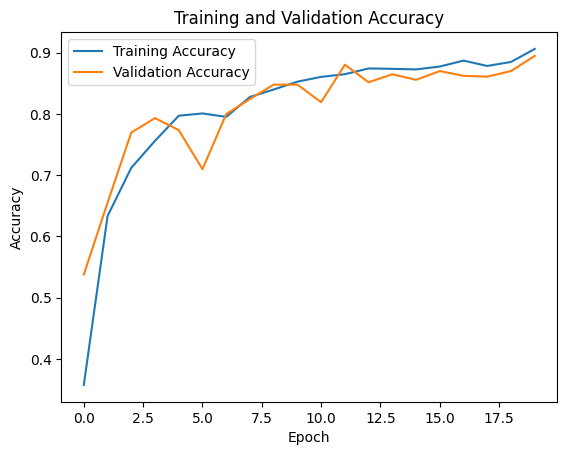

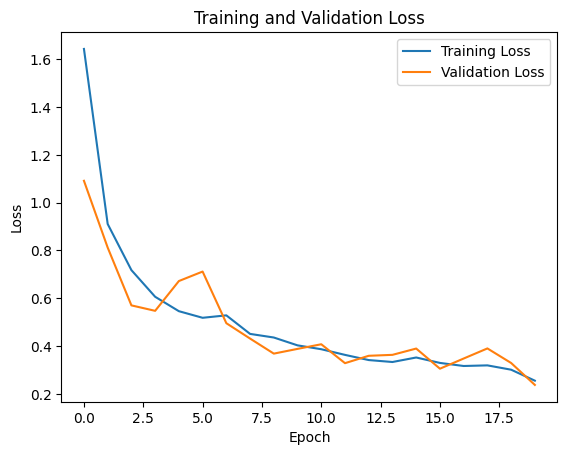

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

7/7 [==============================] - 4s 513ms/step - loss: 0.2405 - accuracy: 0.8950

Test accuracy: 0.8949999809265137

Test loss: 0.2405407726764679


## Save Trained Model

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model-4.tflite')
tflite_model_file.write_bytes(tflite_model)

35785340

## Write metadata to the model

In [ ]:
!pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 26.4 MB/s eta 0:00:00


In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "labels.txt"
_SAVE_TO_PATH = "model_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba